In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/knight/train.csv
/kaggle/input/knight/test.csv


In [22]:
df=pd.read_csv('/kaggle/input/knight/train.csv')
test=pd.read_csv('/kaggle/input/knight/test.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [24]:
df.describe()

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


In [25]:
df.isna().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [26]:
df.nunique()

user_name                15
country                  38
review_title          76983
review_description    77628
designation           26424
points                   21
price                   351
province                358
region_1               1019
region_2                 17
winery                13786
variety                  28
dtype: int64

In [27]:
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [28]:
df.groupby(['variety','price']).sum().sort_values('price',ascending=False)

points
variety                  price         
Bordeaux-style Red Blend 3300.0      88
                         2500.0      96
Chardonnay               2013.0      91
Pinot Noir               2000.0      96
Bordeaux-style Red Blend 2000.0      97
...                                 ...
Pinot Grigio             4.0         86
White Blend              4.0         82
Cabernet Sauvignon       4.0         84
Merlot                   4.0         86
Chardonnay               4.0        167

[2810 rows x 1 columns]

In [29]:
df.groupby(['country','price']).sum().sort_values('price',ascending=False)

points
country   price         
France    3300.0      88
          2500.0      96
US        2013.0      91
France    2000.0     193
          1900.0      98
...                  ...
Chile     5.0        339
Argentina 5.0         80
Romania   4.0         86
US        4.0        253
Spain     4.0        166

[1828 rows x 1 columns]

In [30]:
pd.value_counts(df['variety'])

Pinot Noir                    10587
Chardonnay                     9403
Cabernet Sauvignon             7552
Red Blend                      7166
Bordeaux-style Red Blend       5497
Riesling                       4148
Sauvignon Blanc                4011
Syrah                          3316
Rosé                           2831
Merlot                         2471
Nebbiolo                       2242
Zinfandel                      2209
Sangiovese                     2165
Malbec                         2119
Portuguese Red                 1969
White Blend                    1896
Sparkling Blend                1739
Tempranillo                    1448
Rhône-style Red Blend          1182
Pinot Gris                     1148
Champagne Blend                1133
Cabernet Franc                 1095
Grüner Veltliner               1055
Portuguese White                896
Pinot Grigio                    873
Bordeaux-style White Blend      850
Gewürztraminer                  840
Gamay                       

In [31]:
pd.value_counts(df['user_name'],ascending=False,sort=True)

@vossroger          17539
@wineschach          8320
@vboone              6908
@paulgwine           6824
@kerinokeefe         5675
@mattkettmann        4298
@wawinereport        3471
@JoeCz               3054
@gordone_cellars     2768
@AnneInVino          2314
@laurbuzz            1055
@suskostrzewa         511
@worldwineguys        503
@bkfiona               20
@winewchristina         4
Name: user_name, dtype: int64

In [32]:
df['country'] = df['country'].astype('str') 
df['review_title'] = df['review_title'].astype('str')
df['review_description'] = df['review_description'].astype('str')
df['designation'] = df['designation'].astype('str')
df['province'] = df['province'].astype('str')
df['points'] = df['points'].astype('float')
df['price'] = df['price'].astype('float')
df['region_1'] = df['region_1'].astype('str')
df['region_2'] = df['region_2'].astype('str')
df['winery'] = df['winery'].astype('str')
df['variety'] = df['variety'].astype('str')
df['user_name'] = df['user_name'].astype('str')

In [33]:
def get_integer_mapping(lb_make):
    '''
    Return a dict mapping labels to their integer values
    from an SKlearn LabelEncoder
    le = a fitted SKlearn LabelEncoder
    '''
    res = {}
    for cl in lb_make.classes_:
        res.update({cl:lb_make.transform([cl])[0]})

    return res

In [34]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
p = lb_make.fit_transform(df['variety'])
integerMapping = get_integer_mapping(lb_make)


In [35]:
integerMapping 

{'Bordeaux-style Red Blend': 0,
 'Bordeaux-style White Blend': 1,
 'Cabernet Franc': 2,
 'Cabernet Sauvignon': 3,
 'Champagne Blend': 4,
 'Chardonnay': 5,
 'Gamay': 6,
 'Gewürztraminer': 7,
 'Grüner Veltliner': 8,
 'Malbec': 9,
 'Merlot': 10,
 'Nebbiolo': 11,
 'Pinot Grigio': 12,
 'Pinot Gris': 13,
 'Pinot Noir': 14,
 'Portuguese Red': 15,
 'Portuguese White': 16,
 'Red Blend': 17,
 'Rhône-style Red Blend': 18,
 'Riesling': 19,
 'Rosé': 20,
 'Sangiovese': 21,
 'Sauvignon Blanc': 22,
 'Sparkling Blend': 23,
 'Syrah': 24,
 'Tempranillo': 25,
 'White Blend': 26,
 'Zinfandel': 27}

In [36]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
cat = df.copy()
cat['country'] = lb_make.fit_transform(df['country'])
cat['review_title'] = lb_make.fit_transform(df['review_title'])
cat['review_description'] = lb_make.fit_transform(df['review_description'])
cat['province'] = lb_make.fit_transform(df['province'])
cat['designation'] = lb_make.fit_transform(df['designation'])
cat['region_1'] = lb_make.fit_transform(df['region_1'])
cat['region_2'] = lb_make.fit_transform(df['region_2'])
cat['winery'] = lb_make.fit_transform(df['winery'])
cat['variety'] = lb_make.fit_transform(df['variety'])
cat['user_name'] = lb_make.fit_transform(df['user_name'])




cat.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,15,1,2321,16883,17594,83.0,10.0,16,848,17,399,5
1,11,35,52311,70585,26369,89.0,15.0,344,238,3,9668,17
2,15,18,59100,13495,5445,94.0,80.0,233,64,17,10873,11
3,10,11,25802,30311,12333,87.0,22.0,280,85,17,5427,1
4,10,11,18413,67354,13344,88.0,33.0,103,952,17,3789,9


In [37]:
cat.corr()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
user_name,1.000000,0.150165,0.003639,-0.012450,-0.017822,-0.171380,-0.018494,-0.152244,0.057169,-0.135583,0.002039,-0.084261
country,0.150165,1.000000,0.101316,0.011501,0.049515,0.009409,0.003620,-0.084098,0.022971,-0.674887,0.096347,0.117589
review_title,0.003639,0.101316,1.000000,0.001898,0.000370,-0.014705,-0.013416,0.043852,0.090142,-0.077779,0.997803,0.081049
review_description,-0.012450,0.011501,0.001898,1.000000,0.028869,-0.007956,0.011543,0.004655,-0.019850,-0.006147,0.002693,-0.013572
designation,-0.017822,0.049515,0.000370,0.028869,1.000000,-0.125749,-0.064837,-0.006469,-0.029896,-0.068570,-0.000465,-0.065355
points,-0.171380,0.009409,-0.014705,-0.007956,-0.125749,1.000000,0.411550,-0.009809,-0.003664,0.004957,-0.012590,-0.061747
price,-0.018494,0.003620,-0.013416,0.011543,-0.064837,0.411550,1.000000,-0.050946,-0.050951,0.005896,-0.012462,-0.110183
province,-0.152244,-0.084098,0.043852,0.004655,-0.006469,-0.009809,-0.050946,1.000000,0.070957,0.122891,0.040370,0.183814
region_1,0.057169,0.022971,0.090142,-0.019850,-0.029896,-0.003664,-0.050951,0.070957,1.000000,0.090991,0.088688,0.091258
region_2,-0.135583,-0.674887,-0.077779,-0.006147,-0.068570,0.004957,0.005896,0.122891,0.090991,1.000000,-0.074736,0.034471


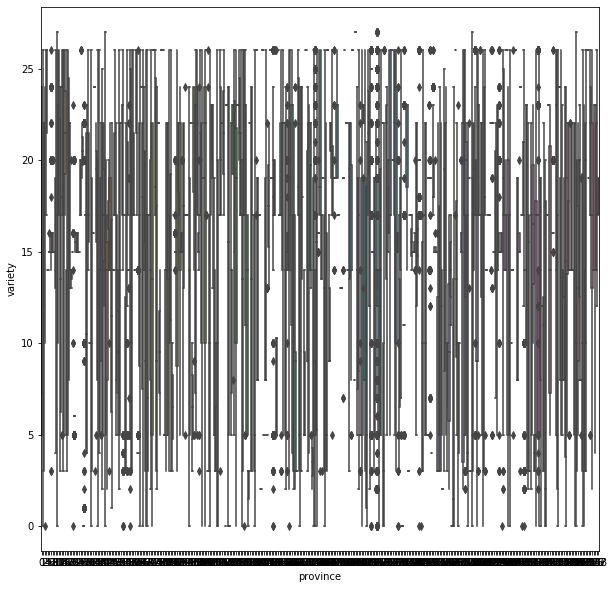

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.boxplot(cat['province'],cat['variety'])

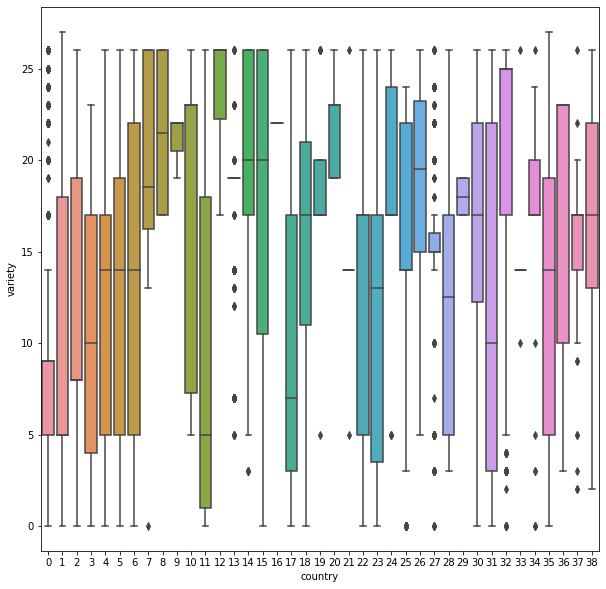

In [39]:
plt.figure(figsize=(10,10))
sns.boxplot(cat['country'],cat['variety'])

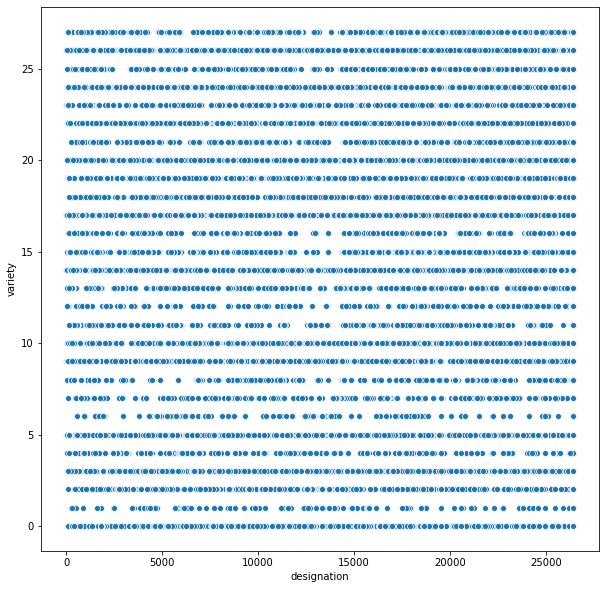

In [40]:
plt.figure(figsize=(10,10))
sns.scatterplot(cat['designation'],cat['variety'])

In [41]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           82657 non-null  int64  
 1   country             82657 non-null  int64  
 2   review_title        82657 non-null  int64  
 3   review_description  82657 non-null  int64  
 4   designation         82657 non-null  int64  
 5   points              82657 non-null  float64
 6   price               77088 non-null  float64
 7   province            82657 non-null  int64  
 8   region_1            82657 non-null  int64  
 9   region_2            82657 non-null  int64  
 10  winery              82657 non-null  int64  
 11  variety             82657 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 7.6 MB


In [42]:
cat['points_user']=cat['points']  * cat['user_name']
cat['price_winery']=cat['price']  * cat['winery']
cat['points_winery']=cat['points']  * cat['winery']
cat['price_province_points']=cat['price']  * cat['province'] * cat['points']



In [43]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_name              82657 non-null  int64  
 1   country                82657 non-null  int64  
 2   review_title           82657 non-null  int64  
 3   review_description     82657 non-null  int64  
 4   designation            82657 non-null  int64  
 5   points                 82657 non-null  float64
 6   price                  77088 non-null  float64
 7   province               82657 non-null  int64  
 8   region_1               82657 non-null  int64  
 9   region_2               82657 non-null  int64  
 10  winery                 82657 non-null  int64  
 11  variety                82657 non-null  int64  
 12  points_user            82657 non-null  float64
 13  price_winery           77088 non-null  float64
 14  points_winery          82657 non-null  float64
 15  pr

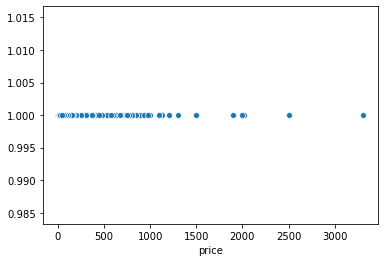

In [44]:
sns.scatterplot(cat['price'],1)

In [45]:
cat['price'].value_counts().sort_values()

281.0        1
1200.0       1
1300.0       1
216.0        1
399.0        1
          ... 
18.0      2886
30.0      3127
25.0      3596
15.0      3627
20.0      4206
Name: price, Length: 351, dtype: int64

In [46]:
cat['price'] = cat['price'].fillna( cat['price'].median() )
cat['price_winery'] = cat['price_winery'].fillna( cat['price_winery'].median() )
cat['price_province_points'] = cat['price_province_points'].fillna( cat['price_province_points'].median() )

In [47]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_name              82657 non-null  int64  
 1   country                82657 non-null  int64  
 2   review_title           82657 non-null  int64  
 3   review_description     82657 non-null  int64  
 4   designation            82657 non-null  int64  
 5   points                 82657 non-null  float64
 6   price                  82657 non-null  float64
 7   province               82657 non-null  int64  
 8   region_1               82657 non-null  int64  
 9   region_2               82657 non-null  int64  
 10  winery                 82657 non-null  int64  
 11  variety                82657 non-null  int64  
 12  points_user            82657 non-null  float64
 13  price_winery           82657 non-null  float64
 14  points_winery          82657 non-null  float64
 15  pr

In [48]:
cat.shape

(82657, 16)

In [49]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

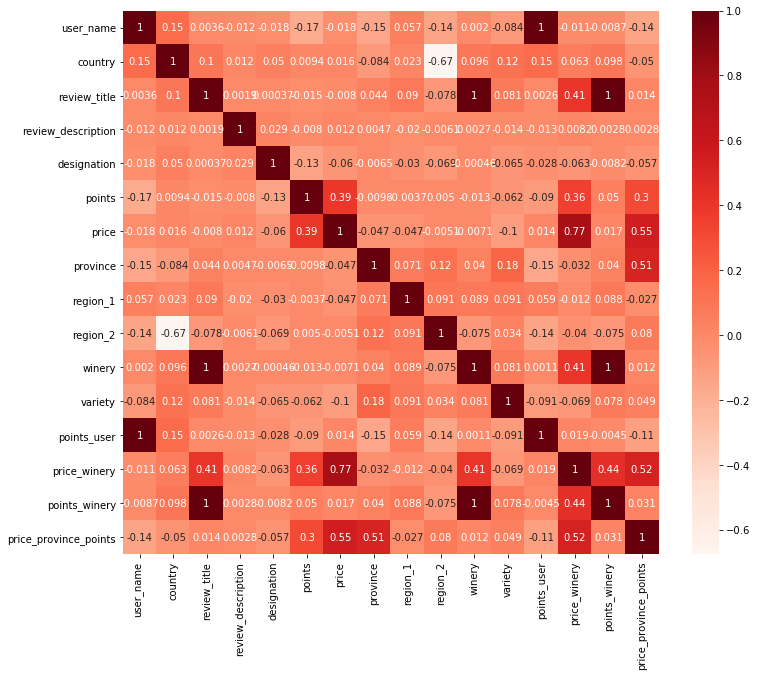

In [50]:
plt.figure(figsize=(12,10))
cor = cat.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [51]:
cat['country_winery']=cat['country']  * cat['winery']
cat['region_1_winery']=cat['region_1']  * cat['winery']
cat['province_winery']=cat['province']  * cat['winery']
cor = cat.corr()

In [52]:
cor_target = abs(cor["variety"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.06]
relevant_features

user_name          0.084261
country            0.117589
review_title       0.081049
designation        0.065355
points             0.061747
price              0.099645
province           0.183814
region_1           0.091258
winery             0.081311
variety            1.000000
points_user        0.091428
price_winery       0.069009
points_winery      0.077572
country_winery     0.098466
region_1_winery    0.099447
province_winery    0.145315
Name: variety, dtype: float64

In [53]:
cor.shape

(19, 19)

In [54]:
cor1=cat.copy()

In [55]:
y = cor1.variety # define the target variable (dependent variable) as y

In [56]:

cor1=cor1.drop(['variety','review_description','region_2','price_province_points','points','price_winery','points_winery'],axis=1)

In [57]:
cor1.shape

(82657, 12)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(cor1, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(66125, 12) (66125,)
(16532, 12) (16532,)


In [59]:
from sklearn.ensemble import RandomForestClassifier
# Create the model with 100 trees
model1 = RandomForestClassifier(n_estimators=200, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model1.fit(X_train, y_train)
# Actual class predictions
rf_predictions = model1.predict(X_test)
# Probabilities for each class
rf_probs = model1.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_auc_score

score = model1.score(X_test, y_test)
print(score)

0.6551536414226954


In [60]:
from sklearn.model_selection import cross_val_score

result_cv = cross_val_score(model1,X_train,y_train,cv=5)

print(result_cv)


[0.63160681 0.64022684 0.63266541 0.63137996 0.63833648]


In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20665 entries, 0 to 20664
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           15927 non-null  object 
 1   country             20661 non-null  object 
 2   review_title        20665 non-null  object 
 3   review_description  20665 non-null  object 
 4   designation         14676 non-null  object 
 5   points              20665 non-null  int64  
 6   price               19271 non-null  float64
 7   province            20661 non-null  object 
 8   region_1            17351 non-null  object 
 9   region_2            8914 non-null   object 
 10  winery              20665 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.7+ MB


In [62]:
test['country'] = test['country'].astype('str') 
test['review_title'] = test['review_title'].astype('str')
test['review_description'] = test['review_description'].astype('str')
test['designation'] = test['designation'].astype('str')
test['province'] = test['province'].astype('str')
test['points'] = test['points'].astype('float')
test['price'] = test['price'].astype('float')
test['region_1'] = test['region_1'].astype('str')
test['region_2'] = test['region_2'].astype('str')
test['winery'] = test['winery'].astype('str')
test['user_name'] = test['user_name'].astype('str')

In [63]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
test1 = test.copy()
test1['country'] = lb_make.fit_transform(test['country'])
test1['review_title'] = lb_make.fit_transform(test['review_title'])
test1['review_description'] = lb_make.fit_transform(test['review_description'])
test1['province'] = lb_make.fit_transform(test['province'])
test1['designation'] = lb_make.fit_transform(test['designation'])
test1['region_1'] = lb_make.fit_transform(test['region_1'])
test1['region_2'] = lb_make.fit_transform(test['region_2'])
test1['winery'] = lb_make.fit_transform(test['winery'])
test1['user_name'] = lb_make.fit_transform(test['user_name'])




test1.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,7,35,1848,9437,474,88.0,35.0,162,747,16,711
1,12,0,12894,4298,3602,90.0,60.0,131,391,17,5168
2,9,35,14973,11609,9602,87.0,38.0,35,185,6,5997
3,12,0,1738,15123,1563,91.0,20.0,131,391,17,661
4,4,19,16492,5512,9602,90.0,49.0,232,84,17,6520


In [64]:
test1['points_user']=test1['points']  * test1['user_name']
test1['price_winery']=test1['price']  * test1['winery']
test1['points_winery']=test1['points']  * test1['winery']
test1['price_province_points']=test1['price']  * test1['province'] * test1['points']



In [65]:
test1['country_winery']=test1['country']  * test1['winery']
test1['region_1_winery']=test1['region_1']  * test1['winery']
test1['province_winery']=test1['province']  * test1['winery']

In [66]:
test2=test1.drop(['review_description','region_2','price_province_points','points','price_winery','points_winery'],axis=1)

In [67]:
test2['price'] = test2['price'].fillna( test2['price'].median() )


In [68]:
pred= model1.predict(test2)

In [69]:
df2=pd.DataFrame(test,pred)

In [70]:
test.insert(11, 'variety_pred', pred)

In [71]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20665 entries, 0 to 20664
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           20665 non-null  object 
 1   country             20665 non-null  object 
 2   review_title        20665 non-null  object 
 3   review_description  20665 non-null  object 
 4   designation         20665 non-null  object 
 5   points              20665 non-null  float64
 6   price               19271 non-null  float64
 7   province            20665 non-null  object 
 8   region_1            20665 non-null  object 
 9   region_2            20665 non-null  object 
 10  winery              20665 non-null  object 
 11  variety_pred        20665 non-null  int64  
dtypes: float64(2), int64(1), object(9)
memory usage: 1.9+ MB


In [95]:
test2=test.copy()

In [96]:
integerMapping

{'Bordeaux-style Red Blend': 0,
 'Bordeaux-style White Blend': 1,
 'Cabernet Franc': 2,
 'Cabernet Sauvignon': 3,
 'Champagne Blend': 4,
 'Chardonnay': 5,
 'Gamay': 6,
 'Gewürztraminer': 7,
 'Grüner Veltliner': 8,
 'Malbec': 9,
 'Merlot': 10,
 'Nebbiolo': 11,
 'Pinot Grigio': 12,
 'Pinot Gris': 13,
 'Pinot Noir': 14,
 'Portuguese Red': 15,
 'Portuguese White': 16,
 'Red Blend': 17,
 'Rhône-style Red Blend': 18,
 'Riesling': 19,
 'Rosé': 20,
 'Sangiovese': 21,
 'Sauvignon Blanc': 22,
 'Sparkling Blend': 23,
 'Syrah': 24,
 'Tempranillo': 25,
 'White Blend': 26,
 'Zinfandel': 27}

In [97]:
print(integerMapping) 

{'Bordeaux-style Red Blend': 0, 'Bordeaux-style White Blend': 1, 'Cabernet Franc': 2, 'Cabernet Sauvignon': 3, 'Champagne Blend': 4, 'Chardonnay': 5, 'Gamay': 6, 'Gewürztraminer': 7, 'Grüner Veltliner': 8, 'Malbec': 9, 'Merlot': 10, 'Nebbiolo': 11, 'Pinot Grigio': 12, 'Pinot Gris': 13, 'Pinot Noir': 14, 'Portuguese Red': 15, 'Portuguese White': 16, 'Red Blend': 17, 'Rhône-style Red Blend': 18, 'Riesling': 19, 'Rosé': 20, 'Sangiovese': 21, 'Sauvignon Blanc': 22, 'Sparkling Blend': 23, 'Syrah': 24, 'Tempranillo': 25, 'White Blend': 26, 'Zinfandel': 27}


In [98]:
inv= dict(map(reversed, integerMapping.items()))

In [99]:
test2['variety_pred']= test2['variety_pred'].map(inv) 

In [101]:
test2

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety_pred
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88.0,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars,Pinot Noir
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90.0,60.0,Mendoza Province,Mendoza,nan,Mendoza Vineyards,Malbec
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",nan,87.0,38.0,California,Coombsville,Napa,Prime,Zinfandel
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91.0,20.0,Mendoza Province,Mendoza,nan,Bodega Cuarto Dominio,Malbec
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",nan,90.0,49.0,Tuscany,Brunello di Montalcino,nan,SassodiSole,Red Blend
...,...,...,...,...,...,...,...,...,...,...,...,...
20660,@gordone_cellars,US,Yorkville Cellars 2013 Rennie Vineyard Caberne...,"Clearly focused and fruit-driven, this wine ha...",Rennie Vineyard,91.0,34.0,California,Yorkville Highlands,North Coast,Yorkville Cellars,Pinot Noir
20661,@laurbuzz,France,Château Ribaute 2015 Senhal d'Aric Rosé (Corbi...,Herbal tones of bay and rosemary are upfront o...,Senhal d'Aric,84.0,20.0,Languedoc-Roussillon,Corbières,nan,Château Ribaute,Rosé
20662,@mattkettmann,US,Daou 2014 Reserve Cabernet Sauvignon (Paso Rob...,"Mocha cream, pencil shaving and dried herb aro...",Reserve,94.0,85.0,California,Paso Robles,Central Coast,Daou,Pinot Noir
20663,@wineschach,Spain,Peñascal 2011 Tempranillo Rosé (Vino de la Tie...,Loud citrus and berry aromas precede an overlo...,Tempranillo,80.0,9.0,Northern Spain,Vino de la Tierra de Castilla y León,nan,Peñascal,Tempranillo


In [103]:
    import os
    test2.to_csv(r'final.csv')
    from IPython.display import FileLink
    FileLink(r'final.csv')